In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [2]:
import pandas as pd
Input_path = '/content/drive/My Drive/ML and AI/Datasets/Iris dataset/iris.csv'
data =  pd.read_csv(Input_path)
display(data.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X = data.iloc[:, :-1].values    #   X -> Feature Variables
y = data.iloc[:, -1].values #   y ->  Target(Labels)

# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### Computing cross-validated metrics

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

The following example demonstrates how to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

models = DecisionTreeClassifier()
scores = cross_val_score(models, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         0.95238095 1.         0.95238095 0.85714286]

Accuracy: 0.95 (+/- 0.10)


### Difference between using cv=5 or cv=KFold(n_splits=5)
1. StratifiedKFold is used if the estimator is a classifier and y is either binary or multiclass.
2. In all other cases, KFold is used.

1. KFold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

models = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(models, X_train, y_train, cv=kfold, scoring='accuracy')
print(scores)
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.90909091 0.90909091 1.         0.90909091 0.90909091 0.9
 1.         1.         1.         1.        ]

Accuracy: 0.95 (+/- 0.09)


2. StratifiedKFold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

models = DecisionTreeClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(models, X_train, y_train, cv=kfold, scoring='accuracy')
print(scores)
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         0.90909091 0.90909091 0.90909091 0.90909091 1.
 1.         1.         0.9        1.        ]

Accuracy: 0.95 (+/- 0.09)


3. StratifiedShuffleSplit

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

models = DecisionTreeClassifier()
kfold = StratifiedShuffleSplit(n_splits=10, random_state=1)
scores = cross_val_score(models, X_train, y_train, cv=kfold, scoring='accuracy')
print(scores)
print()
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Accuracy: 1.00 (+/- 0.00)


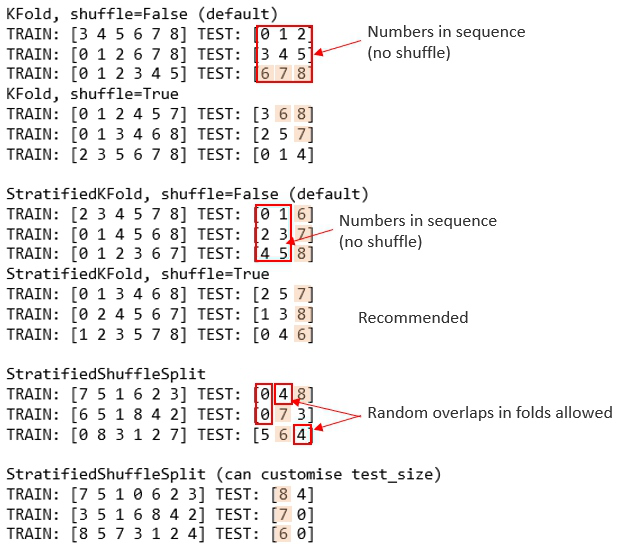

In [ ]:
# Different types of kfold above explained
from PIL import Image
import requests

url = "https://i.stack.imgur.com/PUBCh.jpg"
im = Image.open(requests.get(url, stream=True).raw)
im

## ML_Select_Best_Model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) # creating 10 fold
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.934545 (0.071789)
LDA: 0.971818 (0.043112)
KNN: 0.952727 (0.062430)
CART: 0.953636 (0.046435)
NB: 0.935455 (0.058698)
SVM: 0.980909 (0.038236)


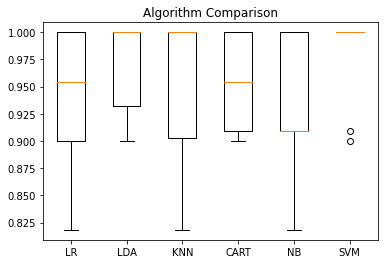

In [ ]:
# Compare Algorithms
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

### Make predictions on validation dataset
Best results we got from SVM model

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print()
# Accuracy score
print('accuracy is',accuracy_score(predictions,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

accuracy is 0.9777777777777777
